# Lista Prática 1 - Analise de séries tmeporais

In [ ]:
## Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import statsmodels.api as sm
import numpy as np

In [ ]:
## Funções
def root_mean_square_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    r = y_true - y_pred
    return np.mean(r**2)**(1/2)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

## Serie temporal

In [ ]:
## Importando a série
df = pd.read_csv("teste.csv",index_col="Month")
df.index = pd.to_datetime(df.index)
df = df.sort_index()

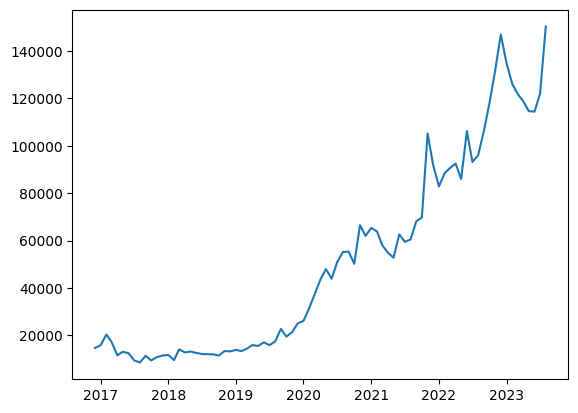

In [ ]:
plt.plot(df.Peak)
plt.show()

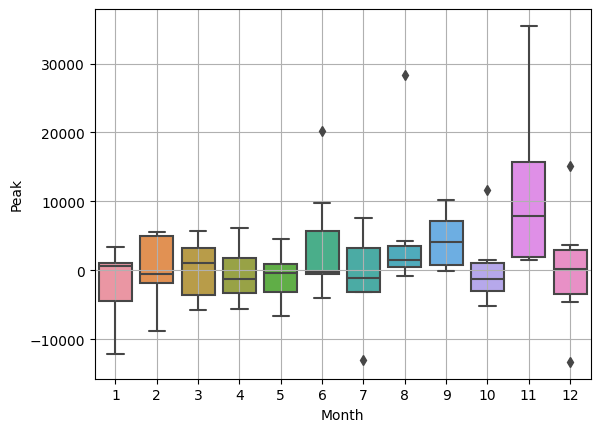

In [ ]:
## Boxplot da primeira diferença
diff_1a = df.Peak.diff()
diff_1a = diff_1a.to_frame()
diff_1a['Month'] = diff_1a.index.month

fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(7,5)})
sns.boxplot(x = "Month", y = "Peak", data = diff_1a, ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

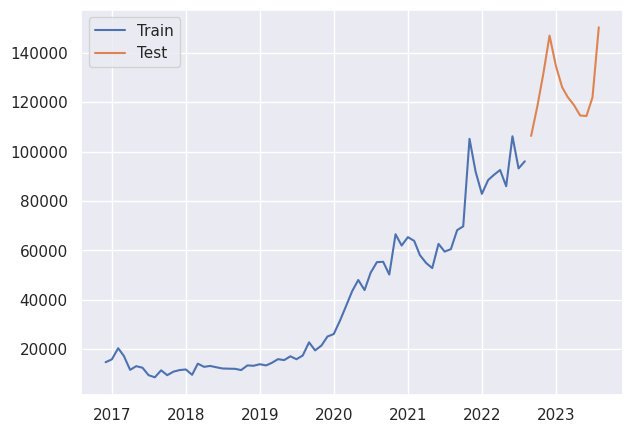

In [ ]:
#Separando teste e treino
players_count_train = df.Peak
players_count_test = players_count_train.tail(12)
players_count_train.drop(players_count_test.index,inplace=True)

plt.plot(players_count_train,label="Train")
plt.plot(players_count_test,label="Test")
plt.legend()
plt.show()

## Modelos ETS

In [ ]:
model_AAN = ETSModel(players_count_train,
    error="add",
    trend="add",
    seasonal=None,
    damped_trend=None,
    seasonal_periods = 12)

model_AAA = ETSModel(players_count_train,
    error="add",
    trend="add",
    seasonal="add",
    damped_trend=None,
    seasonal_periods = 12)

model_AMM = ETSModel(players_count_train,
    error="add",
    trend="multiplicative",
    seasonal="multiplicative",
    damped_trend=None,
    seasonal_periods = 12)

model_AAdA = ETSModel(players_count_train,
    error="add",
    trend="add",
    seasonal="add",
    damped_trend=True,
    seasonal_periods = 12)

model_AMdM = ETSModel(players_count_train,
    error="add",
    trend="multiplicative",
    seasonal="multiplicative",
    damped_trend=True,
    seasonal_periods = 12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
fit_AAN = model_AAN.fit()
fit_AAA = model_AAA.fit()
fit_AMM = model_AMM.fit()
fit_AAdA = model_AAdA.fit()
fit_AMdM = model_AMdM.fit()

fit_list = [fit_AAN,fit_AAA,fit_AMM,fit_AAdA,fit_AMdM]

In [ ]:
for fit in fit_list:
    print(fit.summary())

                                 ETS Results                                  
Dep. Variable:                   Peak   No. Observations:                   69
Model:                       ETS(AAN)   Log Likelihood                -701.305
Date:                Mon, 11 Sep 2023   AIC                           1412.609
Time:                        21:37:22   BIC                           1423.780
Sample:                    12-01-2016   HQIC                          1417.041
                         - 08-01-2022   Scale                     39420511.476
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.5967      0.109      5.458      0.000       0.382       0.811
smoothing_trend     0.0422      0.028      1.487      0.137      -0.013       0.098
initial_level    1.838e+04   591

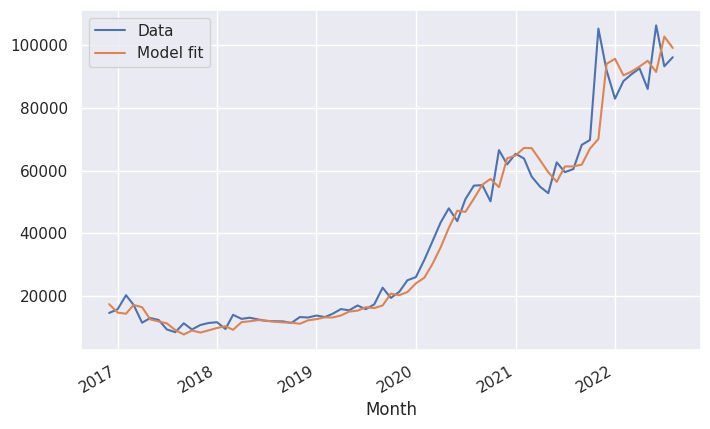

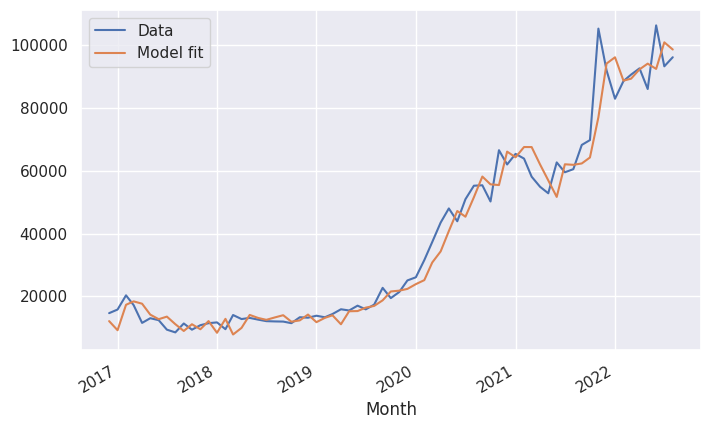

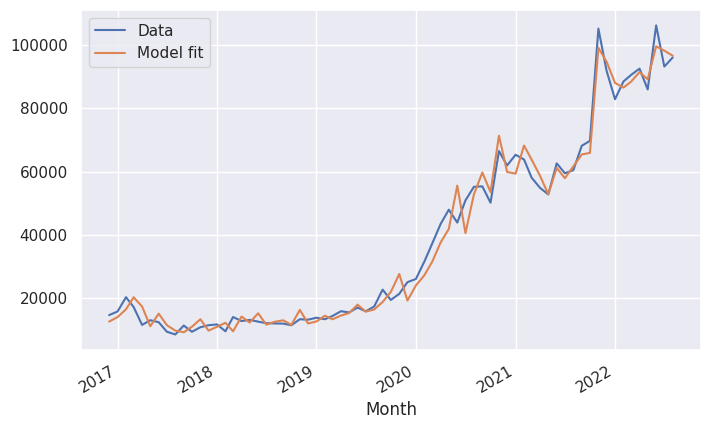

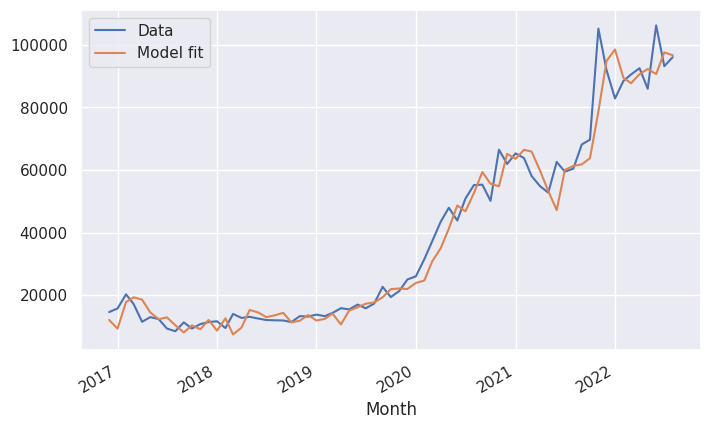

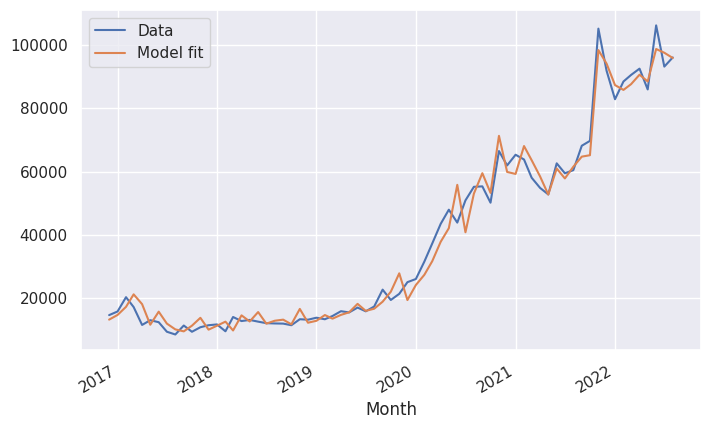

In [ ]:
for fit in fit_list:
    plt.figure(figsize=(8,5))
    plt.plot(players_count_train,label="Data")
    fit.fittedvalues.plot(label="Model fit")
    plt.legend()

6278.575592931876 
 3730.766855052027 
 3730.766855052027 
 10.494849512042405 
 1413.5618801252538
5882.555220801081 
 3955.9862000212534 
 3955.9862000212534 
 12.830550524185227 
 1443.2985356667812
3758.626269423923 
 2975.8916401062565 
 2975.8916401062565 
 11.100171914766491 
 1381.4831341556533
5923.526241925638 
 3954.38911419424 
 3954.38911419424 
 13.195296102291787 
 1448.086555198126
3803.285873947532 
 2995.3143610490733 
 2995.3143610490733 
 11.31667797459685 
 1386.9433749165546


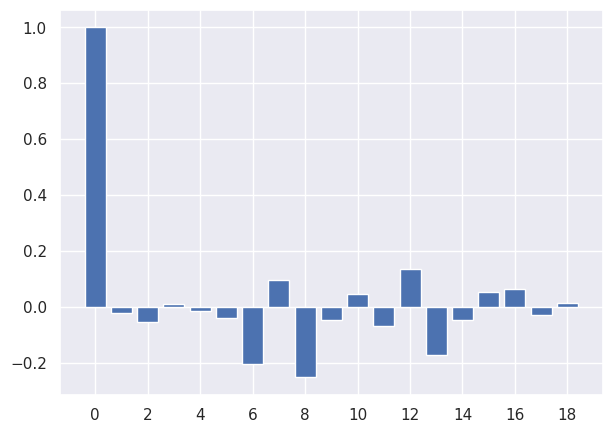

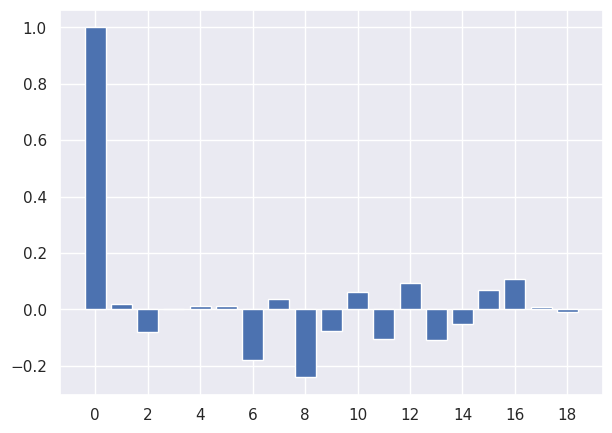

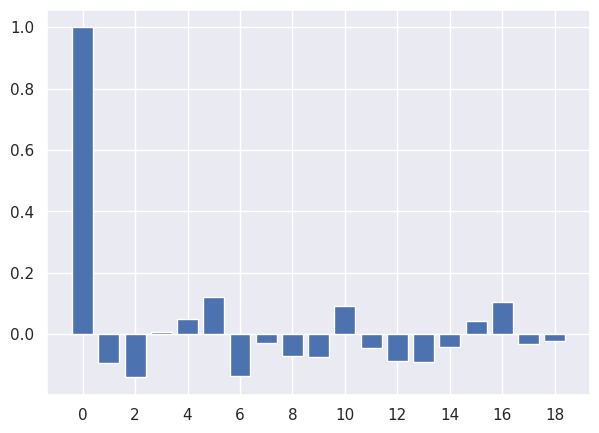

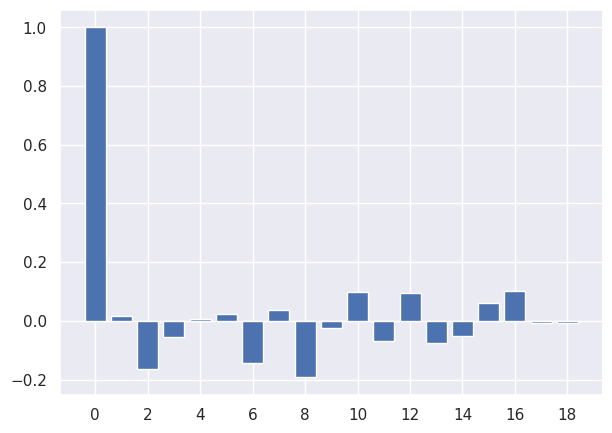

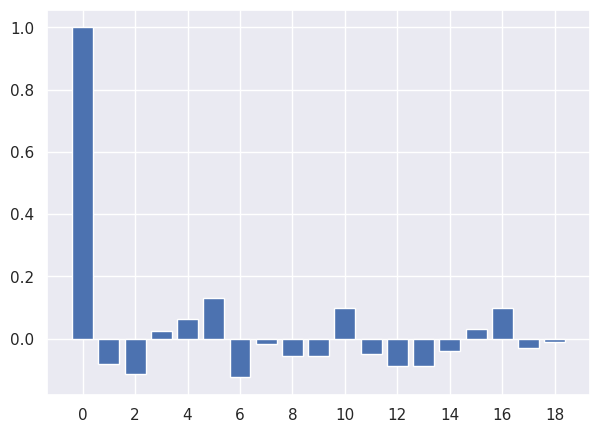

In [ ]:
for fit in fit_list:
    resid = players_count_train - fit.fittedvalues
    mse = root_mean_square_error(players_count_train, fit.fittedvalues)
    mae = mean_absolute_error(players_count_train, fit.fittedvalues)
    mape = mean_absolute_percentage_error(players_count_train, fit.fittedvalues)
    print(mse,"\n",mae,"\n",fit.mae,"\n",mape,"\n",fit.aicc)

    resid_acf = sm.tsa.stattools.acf(resid)
    plt.figure()
    plt.bar(np.array(range(len(resid_acf))),resid_acf)
    _ = plt.xticks(np.arange(0, 20, 2.0))

In [ ]:
np.set_printoptions(precision=2)
np.set_printoptions(linewidth=10)
for fit in fit_list:
    pred = fit.get_prediction(start = "2016-12-01", end= "2022-08-01")

    pred_summary = pred.summary_frame(alpha=0.05)
    error_array = np.zeros([12,1])
    simulated_no_error = fit.simulate(anchor="end", nsimulations=12, repetitions=1, random_errors=error_array)
    print(np.array(simulated_no_error.values).transpose())

    mse = root_mean_square_error(players_count_test, simulated_no_error.values)
    mae = mean_absolute_error(players_count_test, simulated_no_error.values)
    mape = mean_absolute_percentage_error(players_count_test, simulated_no_error.values)
    print(mse)
    print(mae)
    print(mape)

[ 99167.74
 101063.73
 102959.72
 104855.71
 106751.69
 108647.68
 110543.67
 112439.65
 114335.64
 116231.63
 118127.61
 120023.6 ]
20744.38454400127
16258.765608254505
12.206836580176345
[101580.55
 100072.19
 117574.23
 105064.12
 104048.06
 109652.95
 110791.13
 112434.85
 110951.32
 122328.67
 113912.38
 118311.37]
20145.1553027194
16310.458582686604
12.309459685195904
[103961.17
 100527.85
 142921.97
 128721.39
 123319.02
 128794.43
 128720.98
 129974.79
 125269.68
 145137.55
 134236.11
 139176.11]
14169.586916043816
12169.331688148663
9.749825103577187
[100530.58
  97850.87
 116619.89
 100004.54
  96357.77
 101888.69
 101997.21
 102195.88
  98413.02
 109978.61
  97442.97
  99668.17]
27527.109029172014
23641.31650392058
18.0201902329848
[102316.11
  97319.14
 136643.02
 121669.96
 115077.33
 118587.43
 116903.65
 116452.41
 110839.14
 126735.78
 115911.11
 118773.14]
15257.989017832993
11961.779792265937
9.097005980259178


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tail24 = players_count_train.tail(12)
tail12 = players_count_test
tail0 = np.tile(tail24[-1],12)

mse = root_mean_square_error(tail12, tail24.values)
mae = mean_absolute_error(tail12, tail24.values)
mape = mean_absolute_percentage_error(tail12, tail24.values)
print(mse)
print(mae)
print(mape)

mse = root_mean_square_error(tail12, tail0)
mae = mean_absolute_error(tail12, tail0)
mape = mean_absolute_percentage_error(tail12, tail0)
print(mse)
print(mae)
print(mape)

38742.7827612232
36308.416666666664
28.564397923026775
32097.33913166843
29468.666666666668
22.71771456509499


### Predictions

In [ ]:
model = ETSModel(df.Peak,
    error="add",
    trend="multiplicative",
    seasonal="multiplicative",
    damped_trend=True,
    seasonal_periods = 12)

fit = model.fit()

pred = fit.get_prediction(start = "2018-12-01", end= "2023-08-01")

pred_summary = pred.summary_frame(alpha=0.05)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


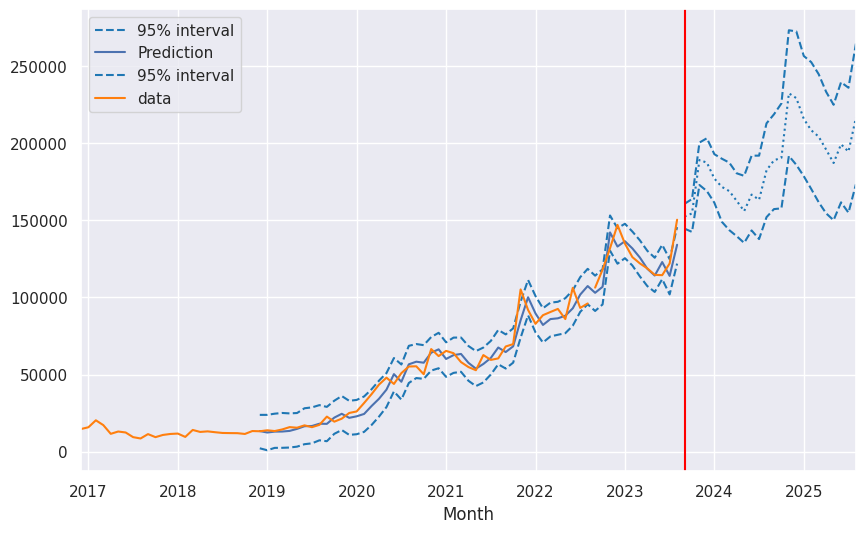

In [ ]:
error_array = np.zeros([24,1])
simulated_no_error = fit.simulate(anchor="end", nsimulations=24, repetitions=1, random_errors=error_array)
simulated_with_error = fit.simulate(anchor="end", nsimulations=24, repetitions=100)

upper_ci = simulated_with_error.quantile(q=0.95, axis='columns')
lower_ci = simulated_with_error.quantile(q=0.05, axis='columns')

plt.figure(figsize=(10,6))
simulated_no_error.plot(linestyle=":",label="_", color="tab:blue")
upper_ci.plot(linestyle="--", color="tab:blue", label="95% interval")
lower_ci.plot(linestyle="--", color="tab:blue", label="_")
pred_summary["mean"].plot(label="Prediction")
pred_summary["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
pred_summary["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
players_count_train.plot(label="data", color="tab:orange")
players_count_test.plot(label="_", color="tab:orange")
plt.axvline(x="2023-09-01",color="red")
plt.legend()
plt.show()

In [1]:
simulated_no_error.plot(label="Prediction", color="tab:blue")
upper_ci.plot(linestyle="--", color="tab:blue", label="95% interval")
lower_ci.plot(linestyle="--", color="tab:blue", label="_")


plt.legend()
plt.show()

NameError: ignored